In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import minimize

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('matplotlibrc')

In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
DF = pd.read_table("cc.dat", sep="\\s+")
DF = DF[DF['X_c'] > 0.3]
DF

,M,e_M,Y,e_Y,Z,e_Z,age,e_age,X_c,e_X_c,CCB_mass,e_CCB_mass,CCB_radius,e_CCB_radius,FM_mass,e_FM_mass,FM_radius,e_FM_radius
0,1.170160,0.042170,0.267701,0.013064,0.029291,0.002844,3.586024,0.773991,0.320967,0.089924,0.013701,0.007542,0.033624,0.013640,0.021183,0.014885,0.037694,0.016866
2,1.431056,0.077762,0.271782,0.006392,0.021674,0.004747,1.372323,0.580546,0.489059,0.073778,0.112884,0.012996,0.122785,0.009686,0.186892,0.025791,0.147229,0.009983
7,1.252542,0.033285,0.277675,0.008833,0.028310,0.001926,2.514499,0.274920,0.348600,0.033961,0.032154,0.012034,0.067577,0.013113,0.034648,0.013019,0.068768,0.013567
16,1.330518,0.040154,0.284467,0.005433,0.022186,0.002594,1.866413,0.278833,0.361995,0.054478,0.086009,0.009848,0.105587,0.007778,0.091686,0.013148,0.107497,0.008878
22,0.993038,0.041916,0.275096,0.016418,0.010040,0.002114,3.515959,0.599283,0.354057,0.065214,0.000806,0.000821,0.001925,0.001911,0.001732,0.001825,0.002453,0.002447
24,1.209190,0.056830,0.267194,0.009391,0.018039,0.003822,2.467464,0.545808,0.337831,0.071184,0.023997,0.013459,0.053361,0.018649,0.029999,0.017994,0.056521,0.020032
27,1.278064,0.031436,0.267056,0.011151,0.023060,0.003486,2.545924,0.451132,0.333973,0.054761,0.045871,0.011281,0.079319,0.010753,0.053036,0.012209,0.082573,0.011141
30,0.752317,0.012273,0.256858,0.006308,0.011370,0.001630,10.772286,0.861181,0.370246,0.021880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,1.312373,0.044361,0.271454,0.009190,0.021193,0.004053,2.387446,0.455001,0.304906,0.062324,0.072118,0.013511,0.095789,0.008779,0.077223,0.014636,0.097915,0.009017
37,0.811989,0.018443,0.262257,0.005820,0.009168,0.001592,4.959465,0.890877,0.509126,0.030107,0.003122,0.003087,0.009025,0.008665,0.005843,0.005876,0.011141,0.010768


In [5]:
Ms = np.arange(0.7, 1.7, 0.01)
X_cs = np.arange(0.3, 0.6, 0.1)

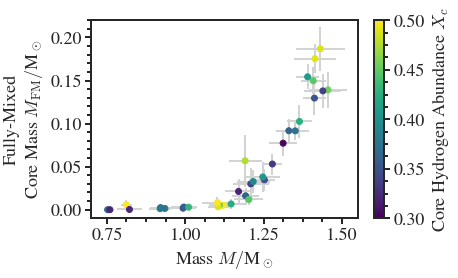

In [6]:
cmap = plt.get_cmap('viridis')
norm = colors.Normalize(vmin=min(X_cs), vmax=max(X_cs))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

plt.errorbar(DF['M'], DF['FM_mass'], xerr=DF['e_M'], yerr=DF['e_FM_mass'], 
             fmt='.', ecolor='lightgray', ms=0, zorder=0)#c=sm.to_rgba(DF['X_c'].values))
plt.scatter(DF['M'], DF['FM_mass'], c=DF['X_c'], cmap=cmap, norm=norm, zorder=1)

plt.colorbar(sm, label='Core Hydrogen Abundance $X_c$', ticks=[0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Mass $M/$M$_\odot$')
plt.ylabel('Fully-Mixed\nCore Mass $M_{\\rm{FM}}/$M$_\odot$')
plt.xlim([0.7, 1.55])
plt.ylim([-0.01, 0.22])

plt.show()

In [7]:
def sigmoid(M, x=[1,1,1]): # Gompertz function 
    x0, x1, x2 = x 
    return x0 * np.exp(-10**x1 * np.exp(-x2 * M)) 

def w_SSE(x): 
    w_SSEs = 0 
    
    for index, star in DF.iterrows(): 
        M         = star['M']
        e_M       = star['e_M']
        FM_mass   = star['FM_mass']
        e_FM_mass = star['e_FM_mass']
        err = (FM_mass - sigmoid(M, x))**2 
        weight = 1/(e_M**2 + e_FM_mass**2)
        w_SSEs += err / weight 
    
    return w_SSEs

In [8]:
x0 = [0.4, 5, 10]
w_SSE(x0)

0.0026324784886714954

In [9]:
res = minimize(w_SSE, x0=x0, tol=1e-8)
x = res.x
x

array([0.28185751, 3.5824152 , 6.14915276])

In [10]:
preds = []
for index, star in DF.iterrows():
    pred = sigmoid(star['M'], x=x)
    preds += [pred]

R2 = 1 - (((DF['FM_mass'] - preds)**2).sum() / 
          ((DF['FM_mass'] - DF['FM_mass'].mean())**2).sum())
print('R2:', np.round(R2, 2))

R2: 0.95


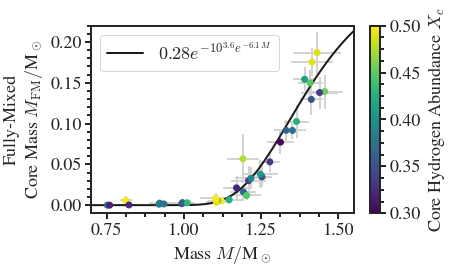

In [11]:
cmap = plt.get_cmap('viridis')
norm = colors.Normalize(vmin=min(X_cs), vmax=max(X_cs))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

plt.plot(Ms, [sigmoid(M, x=x) for M in Ms], 'k-', zorder=0,
        label="$0.28e^{-10^{3.6}e^{-6.1\,M}}$")
#plt.text(0.75, 0.145, "$R^2 = $" + str(np.round(R2, 2)))

plt.errorbar(DF['M'], DF['FM_mass'], xerr=DF['e_M'], yerr=DF['e_FM_mass'], 
             fmt='.', ecolor='lightgray', ms=0, zorder=0, label='')
plt.scatter(DF['M'], DF['FM_mass'], c=DF['X_c'], cmap=cmap, norm=norm, zorder=1, label='')

plt.colorbar(sm, label='Core Hydrogen Abundance $X_c$', ticks=[0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Mass $M/$M$_\odot$')
plt.ylabel('Fully-Mixed\nCore Mass $M_{\\rm{FM}}/$M$_\odot$')
plt.legend(fontsize=18)
plt.xlim([0.7, 1.55])
plt.ylim([-0.01, 0.22])

plt.savefig('FM_mass_sigmoid.pdf', bbox_inches='tight')

plt.show()

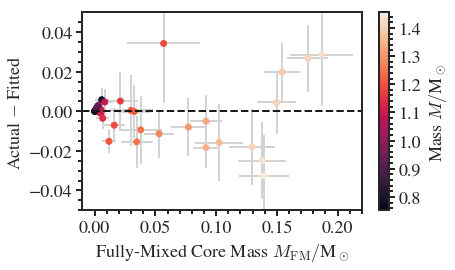

In [12]:
preds = []
for index, star in DF.iterrows():
    pred = sigmoid(star['M'], x=x)
    plt.errorbar(star['FM_mass'], (star['FM_mass'] - pred),#pred, 
                 yerr=star['e_FM_mass'], xerr=star['e_FM_mass'],
                 ecolor='lightgray', ms=2, mec='k', mfc='k', zorder=0)
    preds += [pred]

plt.axhline(0, linestyle='--', color='k')
plt.scatter(DF['FM_mass'], (DF['FM_mass'] - preds), c=DF['M'], zorder=1)
plt.colorbar(label='Mass $M/$M$_\odot$')
plt.xlabel('Fully-Mixed Core Mass $M_{\\rm{FM}}/$M$_\odot$')
plt.ylabel('Actual $-$ Fitted')
plt.xlim([-0.01, 0.22])
plt.ylim([-0.05, 0.05])
plt.show()

Mean +/- Std:  -0.001+/-0.014


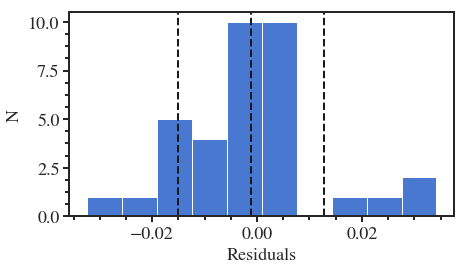

In [13]:
resid = DF['FM_mass'] - preds
print("Mean +/- Std: ", str(round(resid.mean(), 3)) + '+/-' + str(round(resid.std(), 3)))
plt.hist(resid)
plt.axvline(resid.mean(), linestyle='--', c='k')
plt.axvline(resid.mean() - resid.std(), linestyle='--', c='k')
plt.axvline(resid.mean() + resid.std(), linestyle='--', c='k')
plt.xlabel('Residuals')
plt.ylabel('N')
plt.show()